Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[-6.91880618 25.95274086]	2558.404848322607
2		[2.53945965 0.32228446]	207.79779920670677
3		[-0.23948262 -0.7033067 ]	-10.250023419588164
4		[ 0.63817561 -3.08130582]	-30.48567631983468
5		[ 0.38024569 -3.17650215]	-32.36412153235784
6		[ 0.46172363 -3.39720541]	-32.53846993384003
7		[ 0.43776664 -3.40605078]	-32.55467686661099
8		[ 0.44534799 -3.42654183]	-32.55618176222493
9		[ 0.44310891 -3.42736969]	-32.55632340039553
10		[ 0.44381287 -3.4292999 ]	-32.556336754677304
11		[ 0.44361263 -3.42937427]	-32.55633790484487
12		[ 0.44363572 -3.42955901]	-32.556338015113084
13		[ 0.44365593 -3.42955757]	-32.55633802691167
14		[ 0.44366037 -3.42955979]	-32.55633802714029
15		[ 0.4436585  -3.42956166]	-32.55633802742905


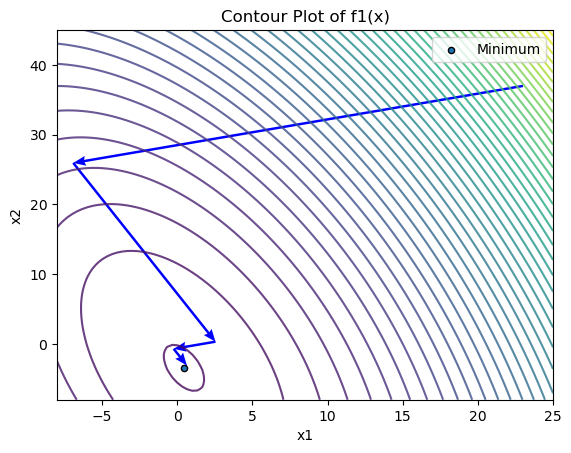

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x[0, 0]

def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')

def gradient_descent(x0, Q, max_iter=100, tol=1e-6, alpha=0.6):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        step_size = opt_sd_step_size(x, Q)
        x = x - step_size * gradient(f1, x, input_size)
        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

# Initial parameters
x0 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

# Define range for contour plot
x_vals = np.linspace(-8, 25, 100)
y_vals = np.linspace(-8, 45, 100)

plot_contour(Q, np.array([[13], [23]]), 4, x_vals, y_vals, levels=50)
minimizer, values, x_history = gradient_descent(x0, Q)
plt.quiver(x_history[:-1, 0], x_history[:-1, 1], x_history[1:, 0] - x_history[:-1, 0], x_history[1:, 1] - x_history[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=4)
plt.scatter(minimizer[0], minimizer[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()


Question 1

Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[-6.91880618 25.95274086]	2558.404848322607
2		[2.53945965 0.32228446]	207.79779920670677
3		[-0.23948262 -0.7033067 ]	-10.250023419588164
4		[ 0.63817561 -3.08130582]	-30.48567631983468
5		[ 0.38024569 -3.17650215]	-32.36412153235784
6		[ 0.46172363 -3.39720541]	-32.53846993384003
7		[ 0.43776664 -3.40605078]	-32.55467686661099
8		[ 0.44534799 -3.42654183]	-32.55618176222493
9		[ 0.44310891 -3.42736969]	-32.55632340039553
10		[ 0.44381287 -3.4292999 ]	-32.556336754677304
11		[ 0.44361263 -3.42937427]	-32.55633790484487
12		[ 0.44363572 -3.42955901]	-32.556338015113084
13		[ 0.44365593 -3.42955757]	-32.55633802691167
14		[ 0.44366037 -3.42955979]	-32.55633802714029
15		[ 0.4436585  -3.42956166]	-32.55633802742905


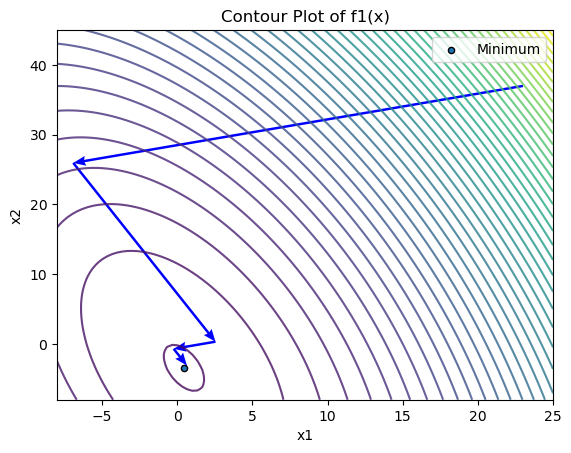

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x[0, 0]

def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')

def gradient_descent_optimal(x0, Q, max_iter=100, tol=1e-6, alpha=0.6):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        step_size = 
        x = x - step_size * gradient(f1, x, input_size)
        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

# Initial parameters
x0 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

# Define range for contour plot
x_vals = np.linspace(-8, 25, 100)
y_vals = np.linspace(-8, 45, 100)

plot_contour(Q, np.array([[13], [23]]), 4, x_vals, y_vals, levels=50)
minimizer, values, x_history = gradient_descent(x0, Q)
plt.quiver(x_history[:-1, 0], x_history[:-1, 1], x_history[1:, 0] - x_history[:-1, 0], x_history[1:, 1] - x_history[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=4)
plt.scatter(minimizer[0], minimizer[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()


Q2

Iteration	X Value				Function Value
0		[23 37]		27836.0
1		[19.24762695 35.61446887]	21893.161054324322
2		[15.5172554  34.17074864]	16743.41929463561
3		[11.81713234 32.65117985]	12382.901973048416
4		[ 8.16097028 31.02868826]	8805.546908741328
5		[ 4.57398428 29.25850989]	6001.040741199755
6		[ 1.10878642 27.26040983]	3949.6889260353296
7		[-2.10007547 24.87227136]	2606.7919287800114
8		[-4.60011338 21.74980271]	1844.009110469833
9		[-4.85642209 17.75802293]	1314.3220575622547
10		[-3.48474026 14.00056515]	868.3332950187246
11		[-2.92087989 10.04050688]	511.69313106679226
12		[-1.56086863  6.27880921]	246.28259790661778
13		[-1.62101799  2.27926148]	82.24745675200909
14		[1.81563685 0.23245824]	116.50345556404073
15		[-1.87259222 -1.31575568]	65.11594960180315
16		[ 2.11780013 -1.03868359]	97.60174823181347
17		[-1.66465229 -2.33985757]	55.89863618089342
18		[ 2.29836591 -1.79719118]	90.93657479152908
19		[-1.53292629 -2.94662587]	52.59629432337431
20		[ 2.40612074 -2.25099054]	88.55

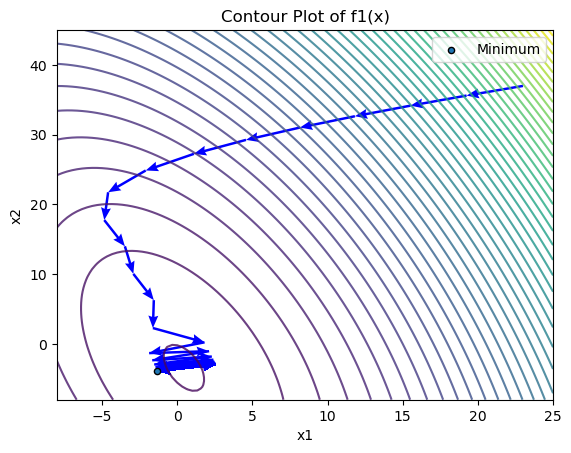

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x[0, 0]

def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')

#defining the step size

def gradient_descent_constant(x0, Q, max_iter, tol, step):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = 4 /np.linalg.norm(gradient(f1, x, input_size))
        x = x - step * gradient(f1, x, input_size)
        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

def gradient_descent_opt(x0, Q, max_iter, tol, step):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = np.transpose(gradient(f1, x, input_size)) @ Q
        x = x - step
        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)


def gradient(f, x, input_size):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta) - f(x)) / h
    return grad



# Initial parameters
x0 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

# Define range for contour plot
x_vals = np.linspace(-8, 25, 100)
y_vals = np.linspace(-8, 45, 100)

plot_contour(Q, np.array([[13], [23]]), 4, x_vals, y_vals, levels=50)
minimizer, values, x_history = gradient_descent_constant(x0, Q, 10000, 1e-10 , step)
# minimizer, values, x_history = gradient_descent_opt(x0, Q, 10000, 1e-10 , step)
plt.quiver(x_history[:-1, 0], x_history[:-1, 1], x_history[1:, 0] - x_history[:-1, 0], x_history[1:, 1] - x_history[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=4)
plt.scatter(minimizer[0], minimizer[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()


Iteration	X Value				Function Value
0		[23 37]		27836.0


TypeError: can't multiply sequence by non-int of type 'float'

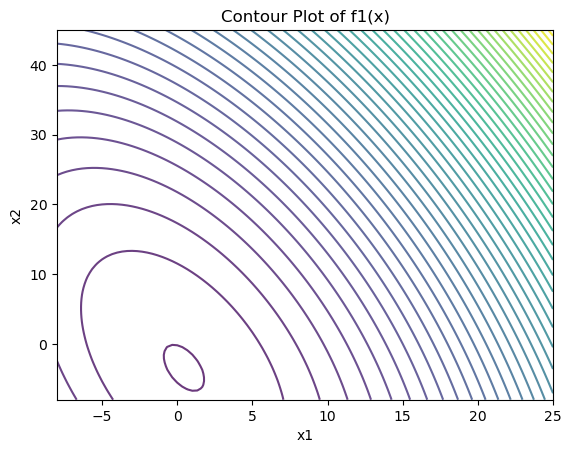

In [157]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f1(x):
    Q = np.array([[48, 12], [8, 8]])
    q = np.array([[13], [23]])
    p = 4
    f1_x = 0.5 * np.matmul(np.transpose(x), np.matmul(Q, x)) + np.matmul(np.transpose(q), x) + p
    return f1_x[0, 0]

def plot_contour(Q, q, p, x_vals, y_vals, levels=None):
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (Q[0, 0] * X**2 + (Q[1, 0] + Q[0, 1]) * X * Y + Q[1, 1] * Y**2) + q[0] * X + q[1] * Y + p

    plt.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.8)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot of f1(x)')

#defining the step size

def gradient_descent_constant(x0, Q, max_iter, tol, step):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        # Using a constant step size (alpha)
        step = 4 /np.linalg.norm(gradient(f1, x, input_size))
        x = x - step * gradient(f1, x, input_size)
        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)

def gradient_descent_opt(x0, Q, max_iter, tol, step):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f1(x)

    x_history = [x.flatten()]

    print("Iteration\tX Value\t\t\t\tFunction Value")
    print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    # Define symbolic variables
    x_symb = sp.symbols('x1 x2')
    f_symb = 0.5 * (Q[0, 0] * x_symb[0]**2 + (Q[1, 0] + Q[0, 1]) * x_symb[0] * x_symb[1] + Q[1, 1] * x_symb[1]**2) + q[0] * x_symb[0] + q[1] * x_symb[1] + p

    # Calculate the gradient symbolically
    grad_symb = [sp.diff(f_symb, var) for var in x_symb]

    # Create a function for the gradient
    gradient_func = sp.lambdify(x_symb, grad_symb, 'numpy')

    for k in range(1, max_iter):
        # Using the symbolic gradient
        x = x - float(step) * gradient_func(*x.flatten())

        val[k] = f1(x)

        x_history.append(x.flatten())

        print(f"{k}\t\t{x.flatten()}\t{val[k]}")

        # Check for convergence
        if np.linalg.norm(gradient(f1, x, input_size)) < tol:
            break

    return x, val[:k+1], np.array(x_history)



def gradient(f, x, input_size):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta) - f(x)) / h
    return grad



# Initial parameters
x0 = np.array([23, 37])
Q = np.array([[48, 12], [8, 8]])

# Define range for contour plot
x_vals = np.linspace(-8, 25, 100)
y_vals = np.linspace(-8, 45, 100)

plot_contour(Q, np.array([[13], [23]]), 4, x_vals, y_vals, levels=50)
# minimizer, values, x_history = gradient_descent_constant(x0, Q, 10000, 1e-10 , step)
minimizer, values, x_history = gradient_descent_opt(x0, Q, 10000, 1e-10 , step)
plt.quiver(x_history[:-1, 0], x_history[:-1, 1], x_history[1:, 0] - x_history[:-1, 0], x_history[1:, 1] - x_history[:-1, 1],
           scale_units='xy', angles='xy', scale=1, color='blue', width=0.005, headwidth=4)
plt.scatter(minimizer[0], minimizer[1], s=20, label='Minimum', edgecolors='black')
plt.legend()

plt.show()
